
### Comparative Sequence Analysis of Covid19, MERS,SARS and EBOLA
- Compare their DNA sequence and Protein (Amino Acid) sequence
- GC Content
- Freq of Each Amino Acids
- Find similarity between them
  *  Alignment
  * hamming distance
- 3D structure of each

##### Datasource
- Latest Sequence: https://www.ncbi.nlm.nih.gov/genbank/sars-cov-2-seqs/
- Wuhan-Hu-1: https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3?report=fasta
- Covid19: https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta
- SARS:https://www.ncbi.nlm.nih.gov/nuccore/NC_004718.3?report=fasta
- MERS:https://www.ncbi.nlm.nih.gov/nuccore/NC_019843.3?report=fasta
- EBOLA : https://www.ncbi.nlm.nih.gov/nuccore/NC_002549.1?report=fasta

##### PDB files
- Covid19 : https://www.rcsb.org/3d-view/6LU7
- SARS: https://www.rcsb.org/structure/5XES
- MERS:
- EBOLA:https://www.rcsb.org/structure/6HS4



In [1]:
! pip install biopython

     |████████████████████████████████| 2.3MB 2.6MB/s 


In [3]:
# Alignment Types 

##  Global alignment: finds the best concordance/agreement betwenn all characters in two sequences 
## Local Alignment: finds just the subsequences that align the best

from Bio.Seq import Seq
from Bio.SeqUtils import GC
from Bio import pairwise2
from Bio.pairwise2 import format_alignment


### Comparative Analysis of Covid,SARS,MERS,Ebola
+ Covid19(SARS-CoV2) is a novel coronavirus identified as the cause of coronavirus disease 2019 (COVID-19) that began in Wuhan, China in late 2019 and spread worldwide.
+ MERS(MERS-CoV) was identified in 2012 as the cause of Middle East respiratory syndrome (MERS).
+ SARS(SARS-CoV) was identified in 2002 as the cause of an outbreak of severe acute respiratory syndrome (SARS).

In [4]:
from Bio import SeqIO

In [5]:
from google.colab import files

files.upload()

Saving covid_MN908947.3.fasta to covid_MN908947.3.fasta


{'covid_MN908947.3.fasta': b'>MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome\nATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA\nCGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC\nTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTG\nTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC\nCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTAC\nGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG\nCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT\nGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTC\nGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCT\nTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTA\nGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTG\nTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGG\nCCCTGATGGC

In [6]:
covid = SeqIO.read("covid_MN908947.3.fasta","fasta")
covid

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [7]:
files.upload()

Saving mers_NC_019843.3.fasta to mers_NC_019843.3.fasta


{'mers_NC_019843.3.fasta': b'>NC_019843.3 Middle East respiratory syndrome-related coronavirus isolate HCoV-EMC/2012, complete genome\nGATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTTTGATTTTAACGAACTT\nAAATAAAAGCCCTGTTGTTTAGCGTATCGTTGCACTTGTCTGGTGGGATTGTGGCATTAATTTGCCTGCT\nCATCTAGGCAGTGGACATATGCTCAACACTGGGTATAATTCTAATTGAATACTATTTTTCAGTTAGAGCG\nTCGTGTCTCTTGTACGTCTCGGTCACAATACACGGTTTCGTCCGGTGCGTGGCAATTCGGGGCACATCAT\nGTCTTTCGTGGCTGGTGTGACCGCGCAAGGTGCGCGCGGTACGTATCGAGCAGCGCTCAACTCTGAAAAA\nCATCAAGACCATGTGTCTCTAACTGTGCCACTCTGTGGTTCAGGAAACCTGGTTGAAAAACTTTCACCAT\nGGTTCATGGATGGCGAAAATGCCTATGAAGTGGTGAAGGCCATGTTACTTAAAAAGGAGCCACTTCTCTA\nTGTGCCCATCCGGCTGGCTGGACACACTAGACACCTCCCAGGTCCTCGTGTGTACCTGGTTGAGAGGCTC\nATTGCTTGTGAAAATCCATTCATGGTTAACCAATTGGCTTATAGCTCTAGTGCAAATGGCAGCCTGGTTG\nGCACAACTTTGCAGGGCAAGCCTATTGGTATGTTCTTCCCTTATGACATCGAACTTGTCACAGGAAAGCA\nAAATATTCTCCTGCGCAAGTATGGCCGTGGTGGTTATCACTACACCCCATTCCACTATGAGCGAGACAAC\nACCTCTTGCCCTGAGTGGATGGACGATTTTGAGGCGGATCCTAAAGGCAAATATGCCCAGAATCTGCTTA\nA

In [8]:
mers = SeqIO.read("mers_NC_019843.3.fasta","fasta")
mers

SeqRecord(seq=Seq('GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTT...AAA'), id='NC_019843.3', name='NC_019843.3', description='NC_019843.3 Middle East respiratory syndrome-related coronavirus isolate HCoV-EMC/2012, complete genome', dbxrefs=[])

In [9]:
files.upload()

Saving sars_NC_004718.3.fasta to sars_NC_004718.3.fasta


{'sars_NC_004718.3.fasta': b'>NC_004718.3 SARS coronavirus Tor2, complete genome\nATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCTCTAAACGA\nACTTTAAAATCTGTGTAGCTGTCGCTCGGCTGCATGCCTAGTGCACCTACGCAGTATAAACAATAATAAA\nTTTTACTGTCGTTGACAAGAAACGAGTAACTCGTCCCTCTTCTGCAGACTGCTTACGGTTTCGTCCGTGT\nTGCAGTCGATCATCAGCATACCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTTC\nTTGGTGTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTCCTTCAGGTTAGAGACGTGCTAGTGCG\nTGGCTTCGGGGACTCTGTGGAAGAGGCCCTATCGGAGGCACGTGAACACCTCAAAAATGGCACTTGTGGT\nCTAGTAGAGCTGGAAAAAGGCGTACTGCCCCAGCTTGAACAGCCCTATGTGTTCATTAAACGTTCTGATG\nCCTTAAGCACCAATCACGGCCACAAGGTCGTTGAGCTGGTTGCAGAAATGGACGGCATTCAGTACGGTCG\nTAGCGGTATAACACTGGGAGTACTCGTGCCACATGTGGGCGAAACCCCAATTGCATACCGCAATGTTCTT\nCTTCGTAAGAACGGTAATAAGGGAGCCGGTGGTCATAGCTATGGCATCGATCTAAAGTCTTATGACTTAG\nGTGACGAGCTTGGCACTGATCCCATTGAAGATTATGAACAAAACTGGAACACTAAGCATGGCAGTGGTGC\nACTCCGTGAACTCACTCGTGAGCTCAATGGAGGTGCAGTCACTCGCTATGTCGACAACAATTTCTGTGGC\nCCAGATGGGTACCCTCTTGATTGCATCAAAGATTTTCTCGCACGCGCGGGCAAG

In [10]:
sars = SeqIO.read("sars_NC_004718.3.fasta","fasta")
sars

SeqRecord(seq=Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA...AAA'), id='NC_004718.3', name='NC_004718.3', description='NC_004718.3 SARS coronavirus Tor2, complete genome', dbxrefs=[])

In [11]:
files.upload()

Saving ebola_NC_002549.1.fasta to ebola_NC_002549.1.fasta


{'ebola_NC_002549.1.fasta': b'>NC_002549.1 Zaire ebolavirus isolate Ebola virus/H.sapiens-tc/COD/1976/Yambuku-Mayinga, complete genome\nCGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATAACTATGAGGAAGATTAATAA\nTTTTCCTCTCATTGAAATTTATATCGGAATTTAAATTGAAATTGTTACTGTAATCACACCTGGTTTGTTT\nCAGAGCCACATCACAAAGATAGAGAACAACCTAGGTCTCCGAAGGGAGCAAGGGCATCAGTGTGCTCAGT\nTGAAAATCCCTTGTCAACACCTAGGTCTTATCACATCACAAGTTCCACCTCAGACTCTGCAGGGTGATCC\nAACAACCTTAATAGAAACATTATTGTTAAAGGACAGCATTAGTTCACAGTCAAACAAGCAAGATTGAGAA\nTTAACCTTGGTTTTGAACTTGAACACTTAGGGGATTGAAGATTCAACAACCCTAAAGCTTGGGGTAAAAC\nATTGGAAATAGTTAAAAGACAAATTGCTCGGAATCACAAAATTCCGAGTATGGATTCTCGTCCTCAGAAA\nATCTGGATGGCGCCGAGTCTCACTGAATCTGACATGGATTACCACAAGATCTTGACAGCAGGTCTGTCCG\nTTCAACAGGGGATTGTTCGGCAAAGAGTCATCCCAGTGTATCAAGTAAACAATCTTGAAGAAATTTGCCA\nACTTATCATACAGGCCTTTGAAGCAGGTGTTGATTTTCAAGAGAGTGCGGACAGTTTCCTTCTCATGCTT\nTGTCTTCATCATGCGTACCAGGGAGATTACAAACTTTTCTTGGAAAGTGGCGCAGTCAAGTATTTGGAAG\nGGCACGGGTTCCGTTTTGAAGTCAAGAAGCGTGATGGAGTGAAGCGCCTTGAGGAATTGCTGCCAGCAGT\n

In [12]:
ebola = SeqIO.read("ebola_NC_002549.1.fasta","fasta")
ebola

SeqRecord(seq=Seq('CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATAACTA...CCA'), id='NC_002549.1', name='NC_002549.1', description='NC_002549.1 Zaire ebolavirus isolate Ebola virus/H.sapiens-tc/COD/1976/Yambuku-Mayinga, complete genome', dbxrefs=[])

In [13]:
covid_seq = covid.seq
mers_seq = mers.seq
sars_seq = sars.seq
ebola_seq = ebola.seq

In [14]:
print(len(covid_seq))
print(len(mers_seq))
print(len(sars_seq))
print(len(ebola_seq))

29903
30119
29751
18959


In [15]:
# Figure out the GC content/heat stable

from Bio.SeqUtils import GC

In [16]:
print('GC content of covid_seq: {}'.format(GC(covid_seq)))
print('GC content of mers_seq: {}'.format(GC(mers_seq)))
print('GC content of sars_seq: {}'.format(GC(sars_seq)))
print('GC content of ebola_seq: {}'.format(GC(ebola_seq)))

GC content of covid_seq: 37.97277865097148
GC content of mers_seq: 41.23642883229855
GC content of sars_seq: 40.7616550704178
GC content of ebola_seq: 41.07284139458832


In [17]:
# Translate protein

covid_protein = covid_seq.translate()
mers_protein = mers_seq.translate()
sars_protein = sars_seq.translate()
ebola_protein = ebola_seq.translate()

/usr/local/lib/python3.6/dist-packages/Bio/Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [18]:
from Bio.SeqUtils import seq3

print(seq3(covid_protein))

IleLysGlyLeuTyrLeuProArgTerGlnThrAsnGlnLeuSerIleSerCysArgSerValLeuTerThrAsnPheLysIleCysValAlaValThrArgLeuHisAlaTerCysThrHisAlaValTerLeuIleThrAsnTyrCysArgTerGlnAspThrSerAsnSerSerIlePheCysArgLeuLeuThrValSerSerValLeuGlnProIleIleSerThrSerArgPheArgProGlyValThrGluArgTerAspGlyGluProCysProTrpPheGlnArgGluAsnThrArgProThrGlnPheAlaCysPheThrGlySerArgArgAlaArgThrTrpLeuTrpArgLeuArgGlyGlyGlyLeuIleArgGlyThrSerThrSerTerArgTrpHisLeuTrpLeuSerArgSerTerLysArgArgPheAlaSerThrTerThrAlaLeuCysValHisGlnThrPheGlyCysSerAsnCysThrSerTrpSerCysTyrGlyTerAlaGlySerArgThrArgArgHisSerValArgSerTerTrpTerAspThrTrpCysProCysProSerCysGlyArgAsnThrSerGlyLeuProGlnGlySerSerSerTerGluArgTerTerArgSerTrpTrpProTerLeuArgArgArgSerLysValIleTerLeuArgArgArgAlaTrpHisTerSerLeuTerArgPheSerArgLysLeuGluHisTerThrTerGlnTrpCysTyrProTerThrHisAlaTerAlaTerArgArgGlyIleHisSerLeuCysArgTerGlnLeuLeuTrpProTerTrpLeuProSerTerValHisTerArgProSerSerThrCysTrpTerSerPheMetHisPheValArgThrThrGlyLeuTyrTerHisTerGluGlyCysIleLeuLeuProTerThrTerAlaTerAsnCysLeuValHisGlyThrPheT

In [22]:
from collections import Counter

covid_freq = Counter(covid_protein)
mers_freq = Counter(mers_protein)
sars_freq = Counter(sars_protein)
ebola_freq = Counter(ebola_protein)

In [20]:
# Plot

import numpy as np
import matplotlib.pyplot as plt

<BarContainer object of 21 artists>

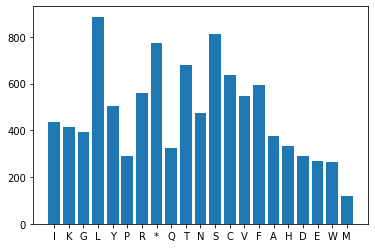

In [21]:
plt.bar(covid_freq.keys(), covid_freq.values())

<BarContainer object of 21 artists>

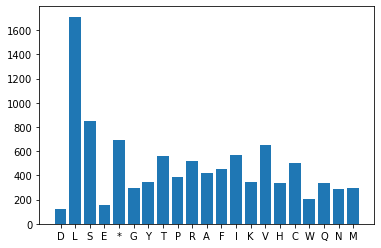

In [23]:
plt.bar(mers_freq.keys(), mers_freq.values())

<BarContainer object of 21 artists>

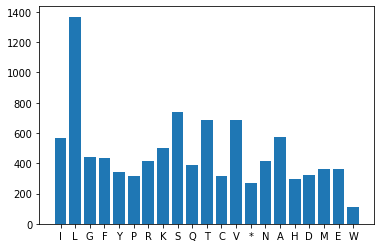

In [24]:
plt.bar(sars_freq.keys(), sars_freq.values())

<BarContainer object of 21 artists>

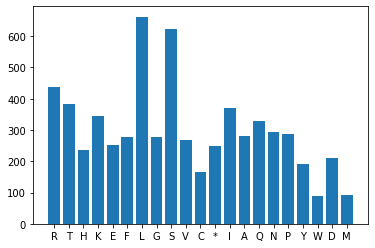

In [25]:
plt.bar(ebola_freq.keys(), ebola_freq.values())

In [26]:
dotplot(covid_seq[:100])

NameError: ignored